# Analysis of `TF-IDF` and `BiLSTM` baselines

In [1]:
import pandas as pd
import json
import torch
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [5]:
tfidf_preds = pd.read_csv("../results/tfidf/predictions.csv")
bilstm_pred = pd.read_csv("../results/bilstm/predictions.csv")

In [6]:
tfidf_preds["correct"] = tfidf_preds["label"] == tfidf_preds["predicted"]
errors_tfidf = tfidf_preds[~tfidf_preds["correct"]]
bilstm_pred["correct"] = bilstm_pred["label"] == bilstm_pred["predicted_label"]
errors_bilstm = bilstm_pred[~bilstm_pred["correct"]]

In [7]:
with open("../results/tfidf/metrics.json") as f:
    tfidf_metrics = json.load(f)

In [8]:
with open("../results/bilstm/metrics.json") as f:
    bilstm_metrics = json.load(f)

In [10]:
print(tfidf_metrics,"\n")
print(bilstm_metrics)

{'hatespeech': {'precision': 0.714975845410628, 'recall': 0.7474747474747475, 'f1-score': 0.7308641975308642, 'support': 594.0}, 'normal': {'precision': 0.6971279373368147, 'recall': 0.6828644501278772, 'f1-score': 0.689922480620155, 'support': 782.0}, 'offensive': {'precision': 0.5009310986964618, 'recall': 0.4908759124087591, 'f1-score': 0.49585253456221196, 'support': 548.0}, 'accuracy': 0.6481288981288982, 'macro avg': {'precision': 0.6376782938146347, 'recall': 0.6404050366704613, 'f1-score': 0.6388797375710771, 'support': 1924.0}, 'weighted avg': {'precision': 0.6467567262250328, 'recall': 0.6481288981288982, 'f1-score': 0.6472868514128829, 'support': 1924.0}} 

{'hatespeech': {'precision': 0.7145748987854251, 'recall': 0.5942760942760943, 'f1-score': 0.6488970588235294, 'support': 594.0}, 'normal': {'precision': 0.6072234762979684, 'recall': 0.6879795396419437, 'f1-score': 0.645083932853717, 'support': 782.0}, 'offensive': {'precision': 0.4375, 'recall': 0.4343065693430657, 'f1-

In [12]:
print("TF-IDF Macro F1:", (tfidf_metrics["macro avg"]["f1-score"]))
print("BiLSTM Macro F1:", (bilstm_metrics["macro avg"]["f1-score"]))

TF-IDF Macro F1: 0.6388797375710771
BiLSTM Macro F1: 0.5766261425248941


In [18]:
labels = ["normal","offensive","hatespeech"]
cm_tfidf = confusion_matrix(tfidf_preds.label, tfidf_preds.label, labels=labels)
cm_bilstm = confusion_matrix(bilstm_pred.label, bilstm_pred.predicted_label, labels=labels)

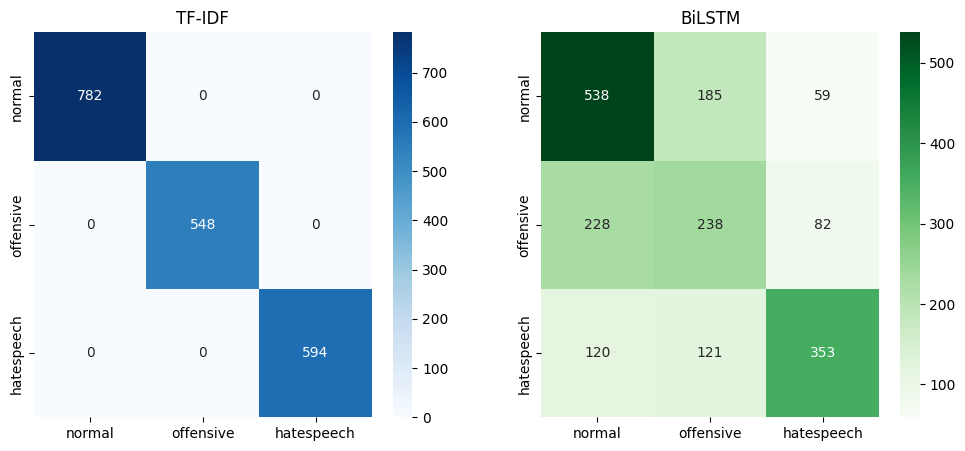

In [25]:
fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.heatmap(cm_tfidf, annot=True, fmt="d",xticklabels=labels, yticklabels=labels,ax=axes[0], cmap="Blues")
axes[0].set_title("TF-IDF")

sns.heatmap(cm_bilstm, annot=True, fmt="d",xticklabels=labels, yticklabels=labels,ax=axes[1], cmap="Greens")
axes[1].set_title("BiLSTM")
plt.savefig("../figures/sm_tfidf_bilstm.png",dpi=300,bbox_inches="tight" )
plt.show()


In [ ]:
tfidf_errors_set = set(errors_tfidf["post_id"])
bilstm_errors_set = set(errors_bilstm["post_id"])
common_errors = tfidf_errors_set.intersection(bilstm_errors_set)
len(common_errors), len(tfidf_errors_set), len(bilstm_errors_set)

(499, 677, 795)

In [ ]:
common_df = bilstm_pred[bilstm_pred["post_id"].isin(common_errors)]
common_df.sample(5)[["text","label","predicted_label"]]

,text,label,predicted_label
1920,sounds like clothing line start line robes cal...,offensive,normal
74,USER resisted years along nubeans south sudan ...,offensive,normal
65,even worse read comments defending vid stating...,offensive,normal
660,well uh not bc zombama cunton arabs blax love ...,hatespeech,offensive
1562,post clearly bait someone wants get sent pictu...,offensive,normal


In [24]:
comparison = pd.DataFrame({
    "Model": ["TF-IDF + LR", "BiLSTM"],
    "Accuracy": [0.648, 0.587],
    "Macro-F1": [0.639, 0.577],
    "Hate F1": [0.731, 0.649],
    "Offensive F1": [0.496, 0.436],
    "Errors": [677, 795],
    "Common Errors": ["499 / 677", "499 / 795"]
})

comparison

,Model,Accuracy,Macro-F1,Hate F1,Offensive F1,Errors,Common Errors
0,TF-IDF + LR,0.648,0.639,0.731,0.496,677,499 / 677
1,BiLSTM,0.587,0.577,0.649,0.436,795,499 / 795


# Conclusion

- Despite `BiLSTM` ability to model word order, TF-IDF outperformed the BiLSTM
- Shows architectural complexity didn't improved its accuracy, instead it became data hungry causing it to remmember the dataset.
- It shows that, pretrained semantic knowledge is required
- It shows need of pretrained large language models